
#        2-Dimensional Z2 Lattice Gauge          #
#   By Hariprashad Ravikumar [hari1729@nmsu.edu] #
#   For Dr. Engelhardt's meeting (January 5, 2023)  #

--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
Expectation value of Wilson loop aXa   : 0.291635150 ± 0.001672038
Expectation value of Wilson loop aX2a  : 0.084727475 ± 0.001753423
Expectation value of Wilson loop aX3a  : 0.023581758 ± 0.001785331
Expectation value of Wilson loop aX4a  : 0.007241379 ± 0.001918842
Expectation value of Wilson loop aX5a  : 0.001412681 ± 0.001870631
Expectation value of Wilson loop aX6a  : 0.000322581 ± 0.001806668
Expectation value of Wilson loop aX7a  : 0.001279199 ± 0.001796029
Expectation value of Wilson loop aX8a  : 0.001457175 ± 0.001830678
Expectation value of Wilson loop aX9a  : 0.002480534 ± 0.001910768
Expectation value of Wilson loop aX10a : 0.004427141 ± 0.001868405
Expectation value of Wilson loop 2aX2a : 0.006796440 ± 0.001654585
Expectation value of Wilson loop 3aX3a : 0.001768632 ± 0.001691312
----------

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


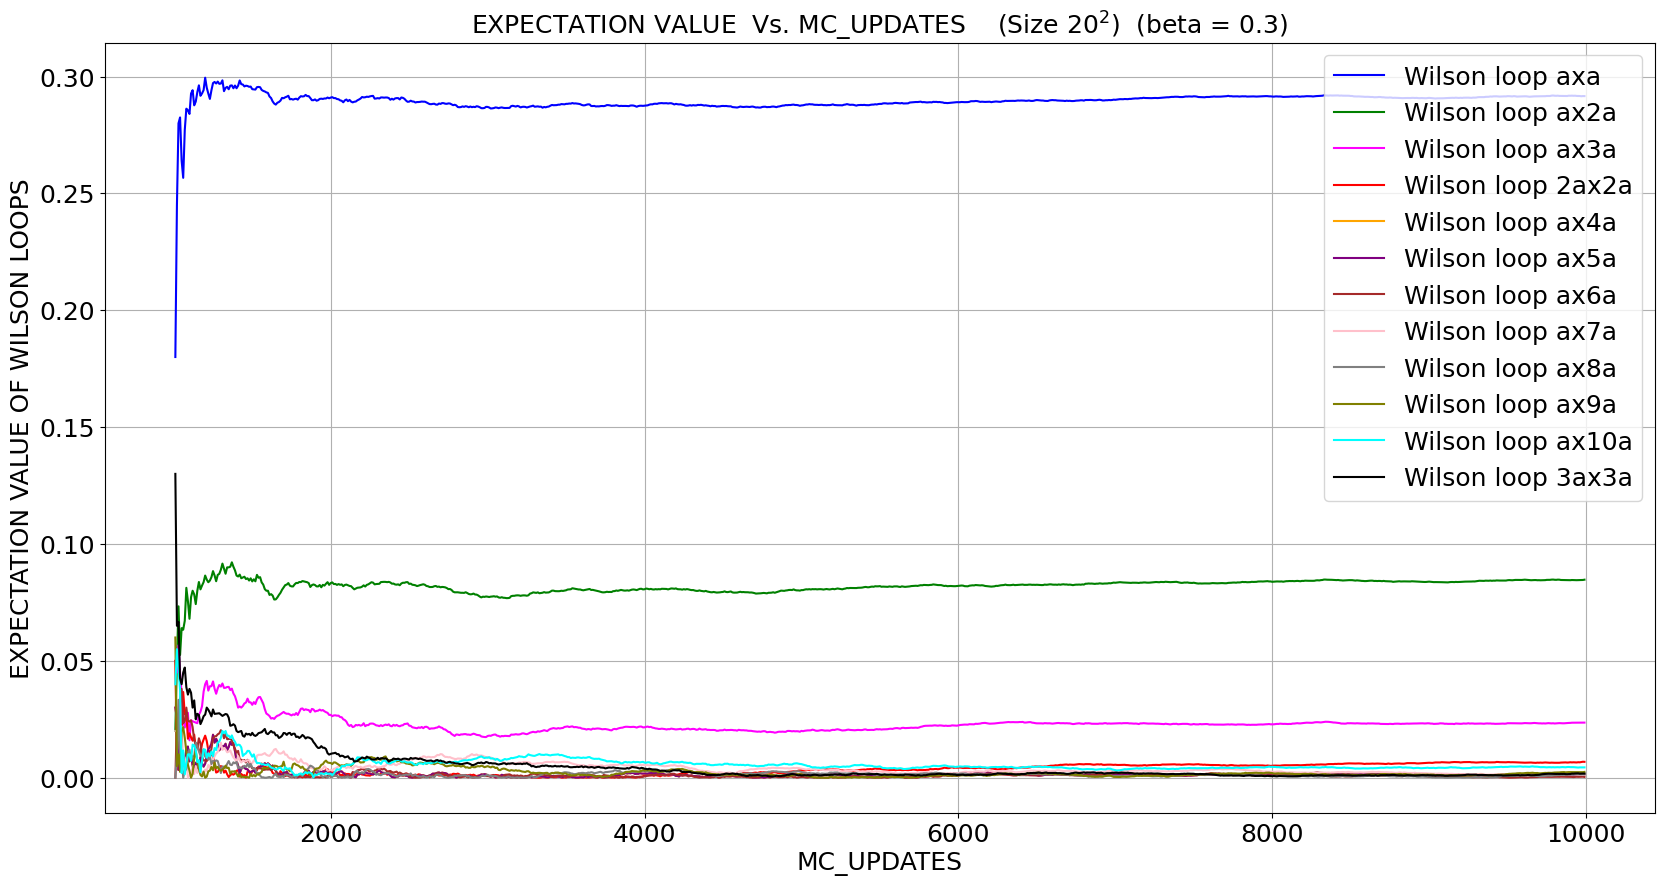

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


--------------------------------------------------------------------------------------------


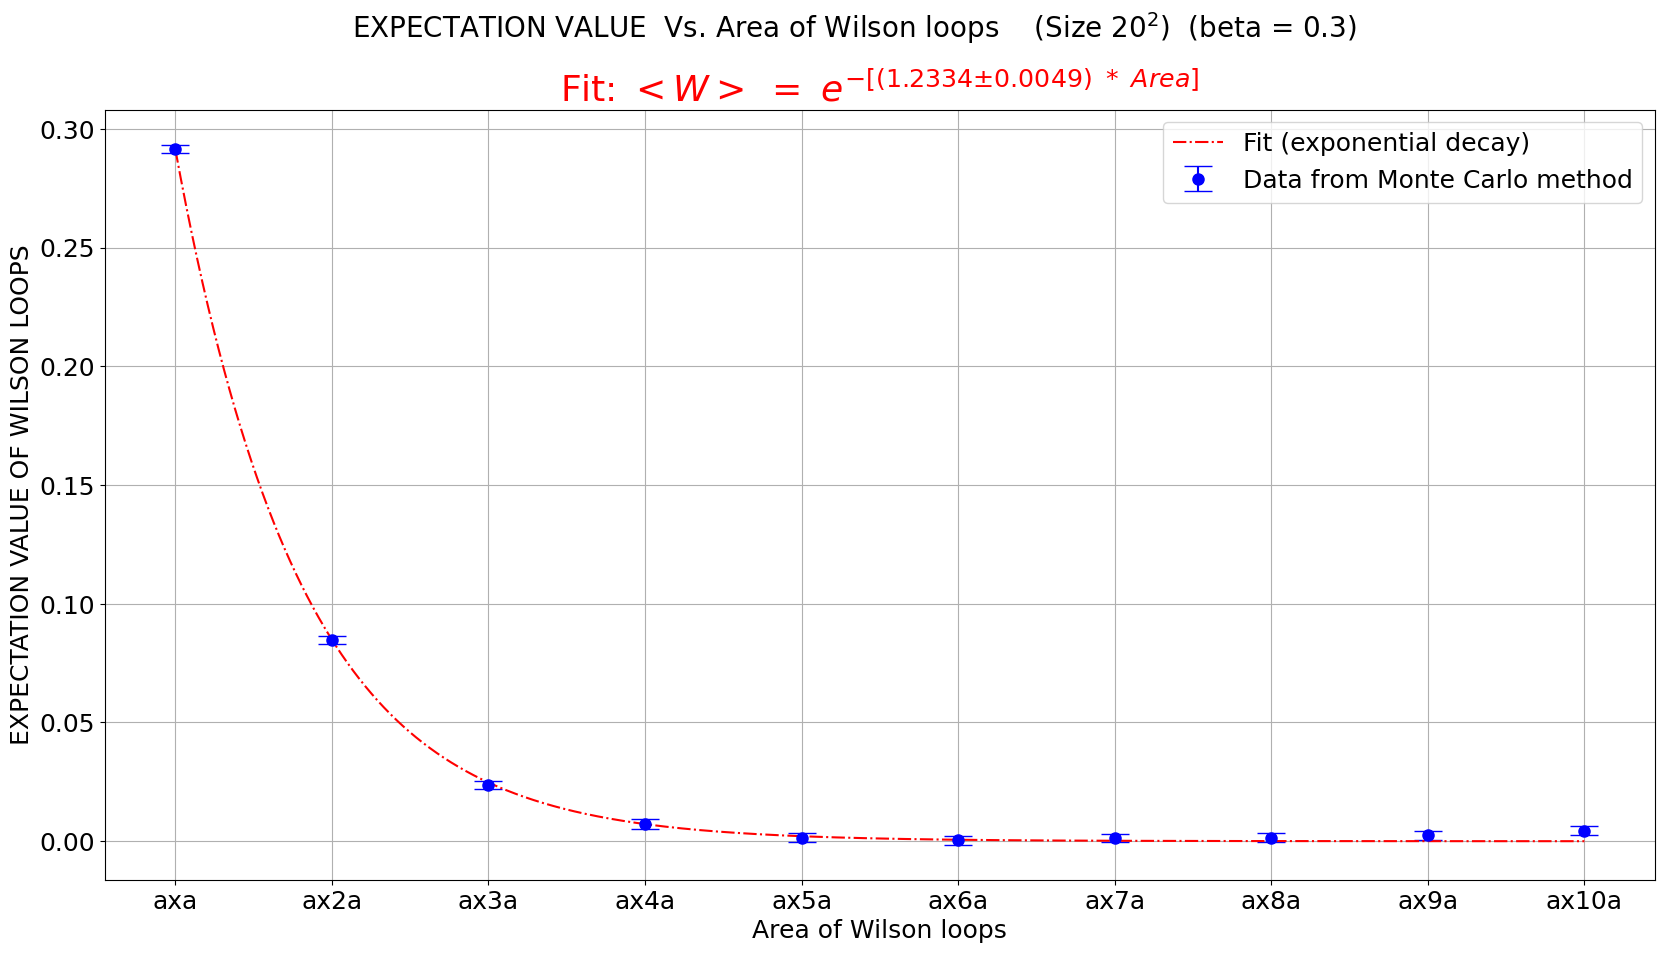

In [1]:
##################################################
#        2-Dimensional Z2 Lattice Gauge          #
#   By Hariprashad Ravikumar [hari1729@nmsu.edu] #
# For Dr. Engelhardt's meeting (January 5, 2023) #
##################################################

import numpy as np
import numpy.random as rnd
#from scipy import random
import itertools
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


N = 20 # Size of the lattice
latt1 = np.ones((N, N), dtype=int)
latt2 = np.ones((N, N), dtype=int)



rng = np.random.default_rng()
def randomstart():
    sites = itertools.product(range(N), range(N))
    for site in sites:
        spin = rng.integers(2)
        if spin == 0:
            spin = -1
        latt1[site] = spin
        latt2[site] = spin
    return None


def coldstart():
    latt1[:] = -1
    latt2[:] = -1
    return None      

def action_axa_update(configuration1,configuration2, beta):
    action_total = 0.0
    acceptance_count = 0.0
    rejection_count = 0.0
    for t in range(N):
        for x in range(N):
            ###############
            # middle and right
            
            #plaquette middle
            left1 = configuration1[t,x]
            down1 = configuration2[t,x]
            right1 = configuration1[t,(x+1)%N] ##
            top1 = configuration2[(t-1)%N,x]
            
            #plaquette right
            r_left = right1 ##
            r_down = configuration2[t,(x+1)%N]
            r_right = configuration1[t,(x+2)%N]
            r_top = configuration2[(t-1)%N,(x+1)%N]
            
            staplesum_middle1 = ((top1*left1*down1))
            staplesum_right = ((r_down*r_right*r_top))
            staplesum_middle_right = (staplesum_middle1+staplesum_right) 
            bplus1 = np.exp(beta*staplesum_middle_right)
            bminus1 = np.exp(-beta*staplesum_middle_right)
            bplus1 = bplus1/(bplus1+bminus1)
            r1 = rng.uniform()
            if r1 < bplus1:
                configuration1[t,(x+1)%N] = 1
                action_total += staplesum_middle_right
                acceptance_count += 1
            else:
                configuration1[t,(x+1)%N] = -1
                action_total -= staplesum_middle_right
                rejection_count += 1
                
            ###############
            # middle and top
            
            #plaquette middle
            left2 = configuration1[t,x] 
            down2 = configuration2[t,x]
            right2 = configuration1[t,(x+1)%N]
            top2 = configuration2[(t-1)%N,x] ##
            
            #plaquette top
            t_left = configuration1[(t-1)%N,x]
            t_down = top2 ##
            t_right = configuration1[(t-1)%N,(x+1)%N]
            t_top = configuration2[(t-2)%N,x]
            
            staplesum_middle2 = ((left2*down2*right2))
            staplesum_top = ((t_right*t_top*t_left))
            staplesum_middle_top = (staplesum_middle2+staplesum_top) 
            
            bplus2 = np.exp(beta*staplesum_middle_top)
            bminus2 = np.exp(-beta*staplesum_middle_top)
            bplus2 = bplus2/(bplus2+bminus2)
            r2 = rng.uniform()
            if r2 < bplus2:
                configuration2[(t-1)%N,x] = 1
                action_total += staplesum_middle_top
                acceptance_count += 1
            else:
                configuration2[(t-1)%N,x] = -1
                action_total -= staplesum_middle_top
                rejection_count += 1
    confi1 = configuration1
    confi2 = configuration2
    return action_total/(4*N**2), confi1, confi2, acceptance_count, rejection_count

def wilson_axa(configuration1, configuration2, beta):
    Wilson_loop__axa = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            left = configuration1[t,x]
            down = configuration2[t,x]
            right = configuration1[t,(x+1)%N]
            top = configuration2[(t-1)%N,x]
            Wilson_loop__axa += ((left*down*right*top))
            count += 1
    return  Wilson_loop__axa/(count)


def wilson_ax2a(configuration1, configuration2, beta):
    Wilson_loop__ax2a = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            left1 = configuration1[t,x]
            left2 = configuration1[(t+1)%N,x]
            down = configuration2[(t+1)%N,x]
            right2 = configuration1[(t+1)%N,(x+1)%N]
            right1 = configuration1[t,(x+1)%N]
            top = configuration2[(t-1)%N,x]
            Wilson_loop__ax2a += ((left1*left2*down*right2*right1*top))
            count += 1
    return  Wilson_loop__ax2a/(count)




def wilson_ax3a(configuration1, configuration2, beta):
    Wilson_loop__ax3a = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            left1 = configuration1[t,x]
            left2 = configuration1[(t+1)%N,x]
            left3 = configuration1[(t+2)%N,x]
            down = configuration2[(t+2)%N,x]
            right3 = configuration1[(t+2)%N,(x+1)%N]
            right2 = configuration1[(t+1)%N,(x+1)%N]
            right1 = configuration1[t,(x+1)%N]
            top = configuration2[(t-1)%N,x]
            #print(left1,left2,left3,down,right3,right2,right1,top)
            Wilson_loop__ax3a += ((left1*left2*left3*down*right3*right2*right1*top))
            count += 1
    return  Wilson_loop__ax3a/(count)


def wilson_2ax2a(configuration1, configuration2, beta):
    Wilson_loop__2ax2a = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            left1 = configuration1[t,x]
            left2 = configuration1[(t+1)%N,x]
            down1 = configuration2[(t+1)%N,x]
            down2 = configuration2[(t+1)%N,(x+1)%N]
            right2 = configuration1[(t+1)%N,(x+2)%N]
            right1 = configuration1[t,(x+2)%N]
            top2 = configuration2[(t-1)%N,(x+1)%N]
            top1 = configuration2[(t-1)%N,x]
            #print(left1,left2,down1,down2,right2,right1,top2,top1)
            Wilson_loop__2ax2a += ((left1*left2*down1*down2*right2*right1*top2*top1))
            count += 1
    return  Wilson_loop__2ax2a/(count)


def wilson_ax4a(configuration1, configuration2, beta):
    Wilson_loop__ax4a = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            left1 = configuration1[t,x]
            left2 = configuration1[(t+1)%N,x]
            left3 = configuration1[(t+2)%N,x]
            left4 = configuration1[(t+3)%N,x]
            down = configuration2[(t+3)%N,x]
            right4 = configuration1[(t+3)%N,(x+1)%N]
            right3 = configuration1[(t+2)%N,(x+1)%N]
            right2 = configuration1[(t+1)%N,(x+1)%N]
            right1 = configuration1[t,(x+1)%N]
            top = configuration2[(t-1)%N,x]
            Wilson_loop__ax4a += ((left1*left2*left3*left4*down*right4*right3*right2*right1*top))
            count += 1
    return  Wilson_loop__ax4a/(count)


def wilson_ax5a(configuration1, configuration2, beta):
    Wilson_loop__ax5a = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            left1 = configuration1[t,x]
            left2 = configuration1[(t+1)%N,x]
            left3 = configuration1[(t+2)%N,x]
            left4 = configuration1[(t+3)%N,x]
            left5 = configuration1[(t+4)%N,x]
            down = configuration2[(t+4)%N,x]
            right5 = configuration1[(t+4)%N,(x+1)%N]
            right4 = configuration1[(t+3)%N,(x+1)%N]
            right3 = configuration1[(t+2)%N,(x+1)%N]
            right2 = configuration1[(t+1)%N,(x+1)%N]
            right1 = configuration1[t,(x+1)%N]
            top = configuration2[(t-1)%N,x]
            Wilson_loop__ax5a += ((left1*left2*left3*left4*left5*down*right5*right4*right3*right2*right1*top))
            count += 1
    return  Wilson_loop__ax5a/(count)


def wilson_ax6a(configuration1, configuration2, beta):
    Wilson_loop__ax6a = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            left1 = configuration1[t,x]
            left2 = configuration1[(t+1)%N,x]
            left3 = configuration1[(t+2)%N,x]
            left4 = configuration1[(t+3)%N,x]
            left5 = configuration1[(t+4)%N,x]
            left6 = configuration1[(t+5)%N,x]
            down = configuration2[(t+5)%N,x]
            right6 = configuration1[(t+5)%N,(x+1)%N]
            right5 = configuration1[(t+4)%N,(x+1)%N]
            right4 = configuration1[(t+3)%N,(x+1)%N]
            right3 = configuration1[(t+2)%N,(x+1)%N]
            right2 = configuration1[(t+1)%N,(x+1)%N]
            right1 = configuration1[t,(x+1)%N]
            top = configuration2[(t-1)%N,x]
            Wilson_loop__ax6a += ((left1*left2*left3*left4*left5*left6*down*right6*right5*right4*right3*right2*right1*top))
            count += 1
    return  Wilson_loop__ax6a/(count)


def wilson_ax7a(configuration1, configuration2, beta):
    Wilson_loop__ax7a = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            left1 = configuration1[t,x]
            left2 = configuration1[(t+1)%N,x]
            left3 = configuration1[(t+2)%N,x]
            left4 = configuration1[(t+3)%N,x]
            left5 = configuration1[(t+4)%N,x]
            left6 = configuration1[(t+5)%N,x]
            left7 = configuration1[(t+6)%N,x]
            down = configuration2[(t+6)%N,x]
            right7 = configuration1[(t+6)%N,(x+1)%N]
            right6 = configuration1[(t+5)%N,(x+1)%N]
            right5 = configuration1[(t+4)%N,(x+1)%N]
            right4 = configuration1[(t+3)%N,(x+1)%N]
            right3 = configuration1[(t+2)%N,(x+1)%N]
            right2 = configuration1[(t+1)%N,(x+1)%N]
            right1 = configuration1[t,(x+1)%N]
            top = configuration2[(t-1)%N,x]
            Wilson_loop__ax7a += ((left1*left2*left3*left4*left5*left6*left7*down*right7*right6*right5*right4*right3*right2*right1*top))
            count += 1
    return  Wilson_loop__ax7a/(count)

def wilson_ax8a(configuration1, configuration2, beta):
    Wilson_loop__ax8a = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            left1 = configuration1[t,x]
            left2 = configuration1[(t+1)%N,x]
            left3 = configuration1[(t+2)%N,x]
            left4 = configuration1[(t+3)%N,x]
            left5 = configuration1[(t+4)%N,x]
            left6 = configuration1[(t+5)%N,x]
            left7 = configuration1[(t+6)%N,x]
            left8 = configuration1[(t+7)%N,x]
            down = configuration2[(t+7)%N,x]
            right8 = configuration1[(t+7)%N,(x+1)%N]
            right7 = configuration1[(t+6)%N,(x+1)%N]
            right6 = configuration1[(t+5)%N,(x+1)%N]
            right5 = configuration1[(t+4)%N,(x+1)%N]
            right4 = configuration1[(t+3)%N,(x+1)%N]
            right3 = configuration1[(t+2)%N,(x+1)%N]
            right2 = configuration1[(t+1)%N,(x+1)%N]
            right1 = configuration1[t,(x+1)%N]
            top = configuration2[(t-1)%N,x]
            Wilson_loop__ax8a += ((left1*left2*left3*left4*left5*left6*left7*left8*down*right8*right7*right6*right5*right4*right3*right2*right1*top))
            count += 1
    return  Wilson_loop__ax8a/(count)

def wilson_ax9a(configuration1, configuration2, beta):
    Wilson_loop__ax9a = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            left1 = configuration1[t,x]
            left2 = configuration1[(t+1)%N,x]
            left3 = configuration1[(t+2)%N,x]
            left4 = configuration1[(t+3)%N,x]
            left5 = configuration1[(t+4)%N,x]
            left6 = configuration1[(t+5)%N,x]
            left7 = configuration1[(t+6)%N,x]
            left8 = configuration1[(t+7)%N,x]
            left9 = configuration1[(t+8)%N,x]
            down = configuration2[(t+8)%N,x]
            right9 = configuration1[(t+8)%N,(x+1)%N]
            right8 = configuration1[(t+7)%N,(x+1)%N]
            right7 = configuration1[(t+6)%N,(x+1)%N]
            right6 = configuration1[(t+5)%N,(x+1)%N]
            right5 = configuration1[(t+4)%N,(x+1)%N]
            right4 = configuration1[(t+3)%N,(x+1)%N]
            right3 = configuration1[(t+2)%N,(x+1)%N]
            right2 = configuration1[(t+1)%N,(x+1)%N]
            right1 = configuration1[t,(x+1)%N]
            top = configuration2[(t-1)%N,x]
            Wilson_loop__ax9a += ((left1*left2*left3*left4*left5*left6*left7*left8*left9*down*right9*right8*right7*right6*right5*right4*right3*right2*right1*top))
            count += 1
    return  Wilson_loop__ax9a/(count)


def wilson_ax10a(configuration1, configuration2, beta):
    Wilson_loop__ax10a = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            left1 = configuration1[t,x]
            left2 = configuration1[(t+1)%N,x]
            left3 = configuration1[(t+2)%N,x]
            left4 = configuration1[(t+3)%N,x]
            left5 = configuration1[(t+4)%N,x]
            left6 = configuration1[(t+5)%N,x]
            left7 = configuration1[(t+6)%N,x]
            left8 = configuration1[(t+7)%N,x]
            left9 = configuration1[(t+8)%N,x]
            left10 = configuration1[(t+9)%N,x]
            down = configuration2[(t+9)%N,x]
            right10 = configuration1[(t+9)%N,(x+1)%N]
            right9 = configuration1[(t+8)%N,(x+1)%N]
            right8 = configuration1[(t+7)%N,(x+1)%N]
            right7 = configuration1[(t+6)%N,(x+1)%N]
            right6 = configuration1[(t+5)%N,(x+1)%N]
            right5 = configuration1[(t+4)%N,(x+1)%N]
            right4 = configuration1[(t+3)%N,(x+1)%N]
            right3 = configuration1[(t+2)%N,(x+1)%N]
            right2 = configuration1[(t+1)%N,(x+1)%N]
            right1 = configuration1[t,(x+1)%N]
            top = configuration2[(t-1)%N,x]
            Wilson_loop__ax10a += ((left1*left2*left3*left4*left5*left6*left7*left8*left9*left10*down*right10*right9*right8*right7*right6*right5*right4*right3*right2*right1*top))
            count += 1
    return  Wilson_loop__ax10a/(count)

def wilson_3ax3a(configuration1, configuration2, beta):
    Wilson_loop__3ax3a = 0.0
    count = 0.0
    for t in range(N):
        for x in range(N):
            left1 = configuration1[t,x]
            left2 = configuration1[(t+1)%N,x]
            left3 = configuration1[(t+2)%N,x]
            down1 = configuration2[(t+2)%N,x]
            down2 = configuration2[(t+2)%N,(x+1)%N]
            down3 = configuration2[(t+2)%N,(x+2)%N]
            right3 = configuration1[(t+2)%N,(x+3)%N]
            right2 = configuration1[(t+1)%N,(x+3)%N]
            right1 = configuration1[t,(x+3)%N]
            top3 = configuration2[(t-1)%N,(x+2)%N]
            top2 = configuration2[(t-1)%N,(x+1)%N]
            top1 = configuration2[(t-1)%N,x]
            #print(left1,left2,left3,down1,down2,down3,right3,right2,right1,top3,top2,top1)
            Wilson_loop__3ax3a += ((left1*left2*left3*down1*down2*down3*right3*right2*right1*top3*top2*top1))
            count += 1
    return  Wilson_loop__3ax3a/(count)




def expectation_axa(beta,N_0,MC_steps):
    coldstart()
    exp_action_axa_lst = []
    exp_axa_lst = []
    exp_ax2a_lst = []
    exp_ax3a_lst = []
    exp_2ax2a_lst = []
    exp_ax4a_lst = []
    exp_ax5a_lst = []
    exp_ax6a_lst = []
    exp_ax7a_lst = []
    exp_ax8a_lst = []
    exp_ax9a_lst = []
    exp_ax10a_lst = []
    exp_3ax3a_lst = []
    mcstep_lst = []
    exp_action_axa = 0.0
    exp_axa = 0.0
    exp_ax2a = 0.0
    exp_ax3a = 0.0
    exp_2ax2a = 0.0
    exp_ax4a = 0.0
    exp_ax5a = 0.0
    exp_ax6a = 0.0
    exp_ax7a = 0.0
    exp_ax8a = 0.0
    exp_ax9a = 0.0
    exp_ax10a = 0.0
    exp_3ax3a = 0.0
    exp_axa_sqar = 0.0
    exp_ax2a_sqar = 0.0
    exp_ax3a_sqar = 0.0
    exp_2ax2a_sqar = 0.0
    exp_ax4a_sqar = 0.0
    exp_ax5a_sqar = 0.0
    exp_ax6a_sqar = 0.0
    exp_ax7a_sqar = 0.0
    exp_ax8a_sqar = 0.0
    exp_ax9a_sqar = 0.0
    exp_ax10a_sqar = 0.0
    exp_3ax3a_sqar = 0.0
    count = 0.0
    config1 = latt1
    config2 = latt2
    for i in range(MC_steps):
        action, config1, config2, acceptance__count, rejection__count = action_axa_update(config1, config2, beta)
        if i > N_0:
            if (i % 10) == 0:
                count += 1 
                Wilson_loop_axa = wilson_axa(config1, config2, beta)
                Wilson_loop_ax2a = wilson_ax2a(config1, config2, beta)
                Wilson_loop_ax3a = wilson_ax3a(config1, config2, beta)
                Wilson_loop_2ax2a = wilson_2ax2a(config1, config2, beta)
                Wilson_loop_ax4a = wilson_ax4a(config1, config2, beta)
                Wilson_loop_ax5a = wilson_ax5a(config1, config2, beta)
                Wilson_loop_ax6a = wilson_ax6a(config1, config2, beta)
                Wilson_loop_ax7a = wilson_ax7a(config1, config2, beta)
                Wilson_loop_ax8a = wilson_ax8a(config1, config2, beta)
                Wilson_loop_ax9a = wilson_ax9a(config1, config2, beta)
                Wilson_loop_ax10a = wilson_ax10a(config1, config2, beta)
                Wilson_loop_3ax3a = wilson_3ax3a(config1, config2, beta)
                exp_action_axa += action
                exp_axa += Wilson_loop_axa
                exp_ax2a += Wilson_loop_ax2a
                exp_ax3a += Wilson_loop_ax3a
                exp_2ax2a += Wilson_loop_2ax2a
                exp_ax4a += Wilson_loop_ax4a
                exp_ax5a += Wilson_loop_ax5a
                exp_ax6a += Wilson_loop_ax6a
                exp_ax7a += Wilson_loop_ax7a
                exp_ax8a += Wilson_loop_ax8a
                exp_ax9a += Wilson_loop_ax9a
                exp_ax10a += Wilson_loop_ax10a
                exp_3ax3a += Wilson_loop_3ax3a
                exp_action_axa_lst.append((exp_action_axa/count))
                exp_axa_lst.append(abs(exp_axa/count))
                exp_ax2a_lst.append(abs(exp_ax2a/count))
                exp_ax3a_lst.append(abs(exp_ax3a/count))
                exp_2ax2a_lst.append(abs(exp_2ax2a/count))
                exp_ax4a_lst.append(abs(exp_ax4a/count))
                exp_ax5a_lst.append(abs(exp_ax5a/count))
                exp_ax6a_lst.append(abs(exp_ax6a/count))
                exp_ax7a_lst.append(abs(exp_ax7a/count))
                exp_ax8a_lst.append(abs(exp_ax8a/count))
                exp_ax9a_lst.append(abs(exp_ax9a/count))
                exp_ax10a_lst.append(abs(exp_ax10a/count))
                exp_3ax3a_lst.append(abs(exp_3ax3a/count))
                mcstep_lst.append(i)
                exp_axa_sqar += Wilson_loop_axa**2
                exp_ax2a_sqar += Wilson_loop_ax2a**2
                exp_ax3a_sqar += Wilson_loop_ax3a**2
                exp_2ax2a_sqar += Wilson_loop_2ax2a**2
                exp_ax4a_sqar += Wilson_loop_ax4a**2
                exp_ax5a_sqar += Wilson_loop_ax5a**2
                exp_ax6a_sqar += Wilson_loop_ax6a**2
                exp_ax7a_sqar += Wilson_loop_ax7a**2
                exp_ax8a_sqar += Wilson_loop_ax8a**2
                exp_ax9a_sqar += Wilson_loop_ax9a**2
                exp_ax10a_sqar += Wilson_loop_ax10a**2
                exp_3ax3a_sqar += Wilson_loop_3ax3a**2
                
    error_wilson_axa = np.sqrt((exp_axa_sqar/count)-(exp_axa_lst[-1])**2)/np.sqrt(count)  
    error_wilson_ax2a = np.sqrt((exp_ax2a_sqar/count)-(exp_ax2a_lst[-1])**2)/np.sqrt(count)  
    error_wilson_ax3a = np.sqrt((exp_ax3a_sqar/count)-(exp_ax3a_lst[-1])**2)/np.sqrt(count) 
    error_wilson_2ax2a = np.sqrt((exp_2ax2a_sqar/count)-(exp_2ax2a_lst[-1])**2)/np.sqrt(count)   
    error_wilson_ax4a = np.sqrt((exp_ax4a_sqar/count)-(exp_ax4a_lst[-1])**2)/np.sqrt(count)  
    error_wilson_ax5a = np.sqrt((exp_ax5a_sqar/count)-(exp_ax5a_lst[-1])**2)/np.sqrt(count)  
    error_wilson_ax6a = np.sqrt((exp_ax6a_sqar/count)-(exp_ax6a_lst[-1])**2)/np.sqrt(count)  
    error_wilson_ax7a = np.sqrt((exp_ax7a_sqar/count)-(exp_ax7a_lst[-1])**2)/np.sqrt(count)  
    error_wilson_ax8a = np.sqrt((exp_ax8a_sqar/count)-(exp_ax8a_lst[-1])**2)/np.sqrt(count)  
    error_wilson_ax9a = np.sqrt((exp_ax9a_sqar/count)-(exp_ax9a_lst[-1])**2)/np.sqrt(count)  
    error_wilson_ax10a = np.sqrt((exp_ax10a_sqar/count)-(exp_ax10a_lst[-1])**2)/np.sqrt(count) 
    error_wilson_3ax3a = np.sqrt((exp_3ax3a_sqar/count)-(exp_3ax3a_lst[-1])**2)/np.sqrt(count)  
    print("--------------------------------------------------------------------------------------------")
    print("--------------------------------------------------------------------------------------------")
    print("Expectation value of Wilson loop aXa   : %.9f" %exp_axa_lst[-1],"\u00B1 %.9f" %error_wilson_axa)
    print("Expectation value of Wilson loop aX2a  : %.9f" %exp_ax2a_lst[-1],"\u00B1 %.9f" %error_wilson_ax2a)
    print("Expectation value of Wilson loop aX3a  : %.9f" %exp_ax3a_lst[-1],"\u00B1 %.9f" %error_wilson_ax3a)
    print("Expectation value of Wilson loop aX4a  : %.9f" %exp_ax4a_lst[-1],"\u00B1 %.9f" %error_wilson_ax4a)
    print("Expectation value of Wilson loop aX5a  : %.9f" %exp_ax5a_lst[-1],"\u00B1 %.9f" %error_wilson_ax5a)
    print("Expectation value of Wilson loop aX6a  : %.9f" %exp_ax6a_lst[-1],"\u00B1 %.9f" %error_wilson_ax6a)
    print("Expectation value of Wilson loop aX7a  : %.9f" %exp_ax7a_lst[-1],"\u00B1 %.9f" %error_wilson_ax7a)
    print("Expectation value of Wilson loop aX8a  : %.9f" %exp_ax8a_lst[-1],"\u00B1 %.9f" %error_wilson_ax8a)
    print("Expectation value of Wilson loop aX9a  : %.9f" %exp_ax9a_lst[-1],"\u00B1 %.9f" %error_wilson_ax9a)
    print("Expectation value of Wilson loop aX10a : %.9f" %exp_ax10a_lst[-1],"\u00B1 %.9f" %error_wilson_ax10a)
    print("Expectation value of Wilson loop 2aX2a : %.9f" %exp_2ax2a_lst[-1],"\u00B1 %.9f" %error_wilson_2ax2a)
    print("Expectation value of Wilson loop 3aX3a : %.9f" %exp_3ax3a_lst[-1],"\u00B1 %.9f" %error_wilson_3ax3a)
    Expectation_wilsonloops = [exp_axa_lst[-1],exp_ax2a_lst[-1],exp_ax3a_lst[-1],exp_ax4a_lst[-1],exp_ax5a_lst[-1],exp_ax6a_lst[-1],exp_ax7a_lst[-1],exp_ax8a_lst[-1],exp_ax9a_lst[-1],exp_ax10a_lst[-1]]
    errors_wilsonloop_expect = [error_wilson_axa, error_wilson_ax2a, error_wilson_ax3a, error_wilson_ax4a, error_wilson_ax5a, error_wilson_ax6a, error_wilson_ax7a, error_wilson_ax8a, error_wilson_ax9a, error_wilson_ax10a,]
    return exp_action_axa_lst, exp_axa_lst, exp_ax2a_lst, exp_ax3a_lst, exp_2ax2a_lst, exp_ax5a_lst, exp_ax5a_lst, exp_ax6a_lst, exp_ax7a_lst, exp_ax8a_lst, exp_ax9a_lst, exp_ax10a_lst, exp_3ax3a_lst, mcstep_lst, Expectation_wilsonloops, errors_wilsonloop_expect

beta_value = 0.3
n_0 = 1000
mc_steps = 10000

exp_action_axa, exp_axa, exp_ax2a, exp_ax3a, exp_2ax2a, exp_ax4a, exp_ax5a, exp_ax6a, exp_ax7a, exp_ax8a, exp_ax9a, exp_ax10a, exp_3ax3a, mcstep_lst, Expectation_wilson_loops, errors_wilson_loop_expect = expectation_axa(beta_value,n_0,mc_steps)

print("--------------------------------------------------------------------------------------------")
plt.subplots(figsize=(20, 10))
#plt.plot(mcstep_lst, exp_action_axa, color='blue',label= 'Action axa' )
plt.plot(mcstep_lst, exp_axa, color='blue',label= 'Wilson loop axa' )
plt.plot(mcstep_lst, exp_ax2a, color='green',label= 'Wilson loop ax2a' )
plt.plot(mcstep_lst, exp_ax3a, color='magenta',label= 'Wilson loop ax3a' )
plt.plot(mcstep_lst, exp_2ax2a, color='red',label= 'Wilson loop 2ax2a' )
plt.plot(mcstep_lst, exp_ax4a, color='orange',label= 'Wilson loop ax4a' )
plt.plot(mcstep_lst, exp_ax5a, color='purple',label= 'Wilson loop ax5a' )
plt.plot(mcstep_lst, exp_ax6a, color='brown',label= 'Wilson loop ax6a' )
plt.plot(mcstep_lst, exp_ax7a, color='pink',label= 'Wilson loop ax7a' )
plt.plot(mcstep_lst, exp_ax8a, color='gray',label= 'Wilson loop ax8a' )
plt.plot(mcstep_lst, exp_ax9a, color='olive',label= 'Wilson loop ax9a' )
plt.plot(mcstep_lst, exp_ax10a, color='cyan',label= 'Wilson loop ax10a' )
plt.plot(mcstep_lst, exp_3ax3a, color='black',label= 'Wilson loop 3ax3a' )
plt.xlabel("MC_UPDATES", fontsize=18)
plt.ylabel("EXPECTATION VALUE OF WILSON LOOPS", fontsize=18)
plt.title("EXPECTATION VALUE  Vs. MC_UPDATES    (Size $%.f^2$)  (beta = %.1f)"%(N,beta_value), fontsize=18)
plt.legend(fontsize=18)
plt.grid(True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('mcstepsz2.eps', dpi=5000)
plt.show()

print("--------------------------------------------------------------------------------------------")
#### Exponenetial decay curve fit ####

x_data = np. array( [1,2,3,4,5,6,7,8,9,10] )
y_data = np. array( Expectation_wilson_loops )
error_for_fit = np. array( errors_wilson_loop_expect )
def curvefit( x, invtau):
      return  np.exp(-x*invtau)
    
popt, pcov = curve_fit( curvefit, x_data, y_data, sigma = error_for_fit,absolute_sigma=True) 
invtau = popt  
invtau_error = np.sqrt(np.diag(pcov))


x_for_fit = np. array([i for i in np.arange(1,10,0.0005)])

x_axis = ['a*a','a*2a','a*3a','a*4a','a*5a','a*6a','a*7a','a*8a','a*9a','a*10a']
x_labels = ['axa', 'ax2a', 'ax3a', 'ax4a', 'ax5a', 'ax6a', 'ax7a', 'ax8a', 'ax9a', 'ax10a']
plt.subplots(figsize=(20, 10))
plt.errorbar(x_data, Expectation_wilson_loops, yerr = errors_wilson_loop_expect, fmt='o', markersize=8, capsize=10, color='blue', label= 'Data from Monte Carlo method')
plt.plot(x_for_fit, curvefit(x_for_fit, invtau),label= 'Fit (exponential decay)', color='red', linestyle="-.")
plt.xlabel("Area of Wilson loops", fontsize=18)
plt.ylabel("EXPECTATION VALUE OF WILSON LOOPS", fontsize=18)
plt.suptitle("EXPECTATION VALUE  Vs. Area of Wilson loops    (Size $%.f^2$)  (beta = %.1f)"%(N,beta_value), fontsize=20)
plt.title("Fit: $<W> ~= ~e^{-[(%.4f \u00B1 %.4f) ~ * ~ Area]}$"%(invtau,invtau_error), fontsize=26, color='red')
plt.grid(True) 
plt.xticks(x_data, x_labels, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.savefig('arealawz2.eps', dpi=5000)
plt.show()